In [0]:
#importando as bibliotecas que serão usadas na análise
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


### 1) Quantidade de inscritos

- **A)** Total  
- **B)** Por faixa etária  
- **C)** Por sexo  
- **D)** Por raça  
- **E)** Por tipo de escola de origem (rede pública x privada)  
- **F)** Por estado  
- **G)** Por renda familiar


**1. A) Quantidade Total de inscritos**

In [0]:
%sql
-- Contando a quantidade de linhas na tabela fato para saber a quantidade de inscritos
SELECT COUNT(*) FROM gold.fato_enem2023

COUNT(*)
3933955


O Total de inscritos no Enem 2023 foi **3.933.955**

**1. B) Quantidade de inscritos por Faixa Etária**


In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold para facilitar a análise da distribuição dos inscritos por faixa etária
SELECT * FROM gold.perfil_inscritos_faixa_etaria

FAIXA_ETARIA,TOTAL_FAIXA_ETARIA,PERCENTUAL_FAIXA_ETARIA
18 anos,905047,23.01
17 anos,753800,19.16
19 anos,431592,10.97
Menor de 17 anos,347434,8.83
20 anos,267383,6.80
Entre 26 e 30 anos,246292,6.26
21 anos,183401,4.66
22 anos,137884,3.50
Entre 31 e 35 anos,133381,3.39
23 anos,111813,2.84


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6490586101621986-3341674021:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


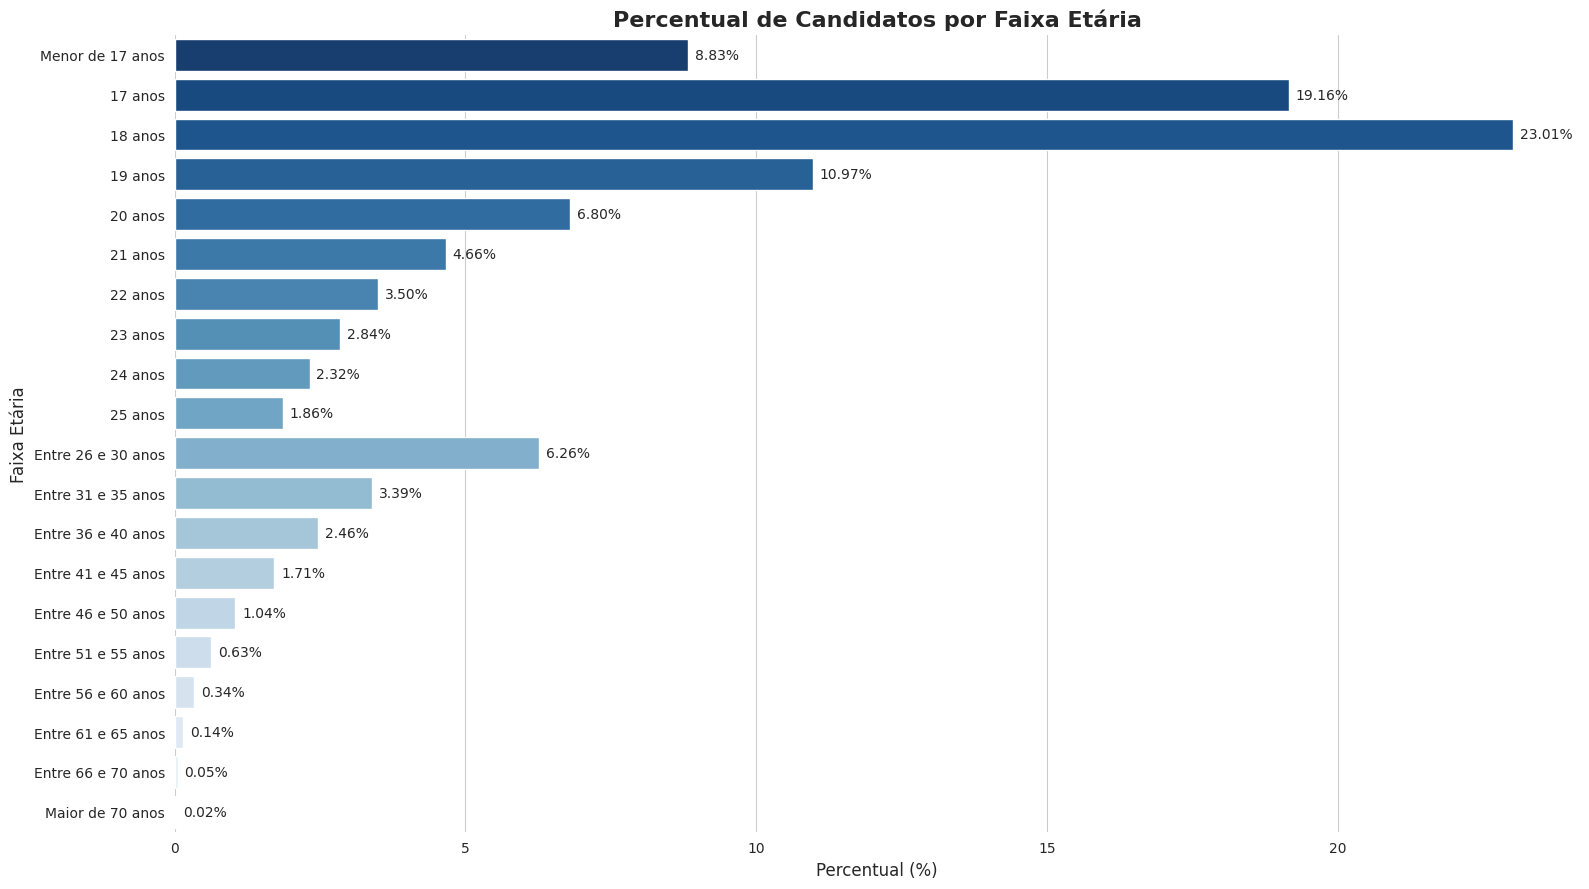

In [0]:
#conversao para um dataframe do pandas
df_faixa_etaria = _sqldf.toPandas() # converte a ultima consulta realizada para um pandas dataframe (df_faixa_etaria)

#definição da ordem das faixas
ordem_faixas = [
    'Menor de 17 anos',
    '17 anos',
    '18 anos',
    '19 anos',
    '20 anos',
    '21 anos',
    '22 anos',
    '23 anos',
    '24 anos',
    '25 anos',
    'Entre 26 e 30 anos',
    'Entre 31 e 35 anos',
    'Entre 36 e 40 anos',
    'Entre 41 e 45 anos',
    'Entre 46 e 50 anos',
    'Entre 51 e 55 anos',
    'Entre 56 e 60 anos',
    'Entre 61 e 65 anos',
    'Entre 66 e 70 anos',
    'Maior de 70 anos'
]

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(16, 9))

ax = sns.barplot(
    data=df_faixa_etaria,
    y='FAIXA_ETARIA', 
    x='PERCENTUAL_FAIXA_ETARIA',
    order=ordem_faixas, #aplica a ordem definida
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Percentual de Candidatos por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Faixa Etária', fontsize=12)

# Adicionar o valor do percentual ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Com base na consulta e no gráfico referente a distribuição podemos ver que a maioria dos inscritos tem 18 anos, seguidos por inscritos com 17 anos e 19 anos, que correspondem as idades esperadas para a conclusão do ensino médio.

**1. C) Quantidade de inscritos por sexo**


In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_inscritos_sexo

SEXO,TOTAL_POR_SEXO,PERCENTUAL_POR_SEXO
Feminino,2411185,61.29
Masculino,1522770,38.71


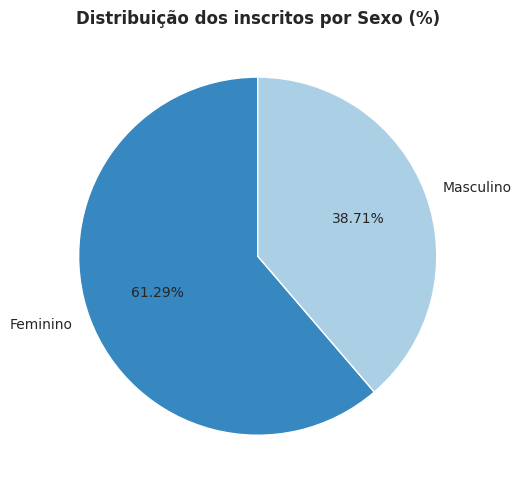

In [0]:
df_dist_sexo = _sqldf.toPandas()
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    df_dist_sexo["PERCENTUAL_POR_SEXO"],
    labels=df_dist_sexo["SEXO"],
    autopct="%.2f%%",
    startangle=90,
    colors=sns.color_palette("Blues_r", len(df_dist_sexo))
)
ax.set_title("Distribuição dos inscritos por Sexo (%)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Com os dados acima, podemos ver que mais de 60% dos inscritos no enem 2023 são do sexo feminino. Isso corresponde a uma concentração maior de mulheres inscritas no Enem do que na população total do Brasil.
Segundo o Censo 2022 a concentração de mulheres era de 51,5% da população, já entre os inscritos da prova 61,29% são mulheres, o que representa uma diferença percentual de quase 10 pontos.

 **1.D) Quantidade de inscritos por raça**



In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_inscritos_por_raca

COR_RACA,TOTAL_POR_RACA,PERCENTUAL_POR_RACA
Parda,1706798,43.39
Branca,1575848,40.06
Preta,509511,12.95
Amarela,64512,1.64
Não declarado,52575,1.34
Indígena,24711,0.63


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6957472988117568-2021616491:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


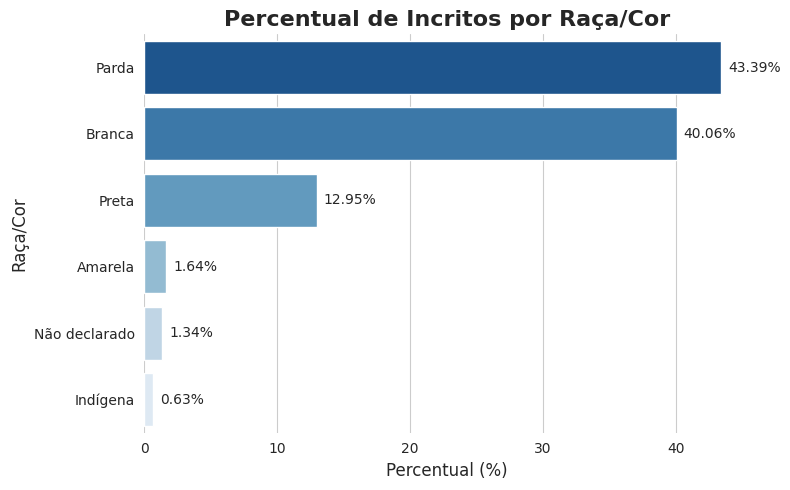

In [0]:
#conversao para um dataframe do pandas
df_dist_raca = _sqldf.toPandas() # converte a ultima consulta realizada para um pandas dataframe

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=df_dist_raca,
    y='COR_RACA', 
    x='PERCENTUAL_POR_RACA',
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Percentual de Incritos por Raça/Cor', fontsize=16, fontweight='bold')
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Raça/Cor', fontsize=12)

# Adicionar o valor do percentual ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


A distribuição de raça/cor segue a mesma ordem da distribuição observada na população brasileira no Censo de 2022.
Sendo os três maiores grupos:
- Pardos no Enem: 43,4%; pardos no Brasil: 45,3%
- Brancos no Enem: 40,0%; brancos no Brasil: 43,5%
- Pretos no Enem: 12,9%; pardos no Brasil: 10,2%

Já os indígenas são o quarto grupo mais representativo no Brasil (0,8%) e o menos representativo entre os inscritos do Enem 2023 (0,6%). Enquanto os Amarelos são 0,4% no Brasil e 1,64% no Enem 2023.

**1.E) Quantidade de inscritos por tipo de escola de origem (rede pública e privada)**



In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_inscritos_tp_escola

TIPO_ESCOLA,TOTAL_TIPO_ESCOLA,PERCENTUAL_TIPO_ESCOLA
Não Respondeu,2532796,64.38
Pública,1166540,29.65
Privada,234619,5.96


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6957472988117570-2238080686:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


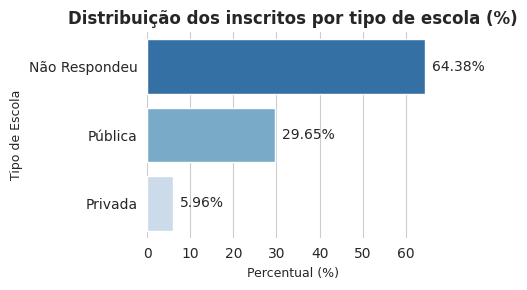

In [0]:
df_dist_tp_ecola = _sqldf.toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(5, 3))

ax = sns.barplot(
    data=df_dist_tp_ecola,
    y="TIPO_ESCOLA", 
    x="PERCENTUAL_TIPO_ESCOLA",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Distribuição dos inscritos por tipo de escola (%)', fontsize=12, fontweight='bold')
plt.xlabel('Percentual (%)', fontsize=9)
plt.ylabel('Tipo de Escola', fontsize=9)

# Adicionar o valor do percentual ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


A maioria dos inscritos não respondeu a escola de origem e por esse motivo essa variável não será usada para as análises de notas.

**1.F) Quantidade de inscritos por estado**



In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_inscritos_por_uf LIMIT 5

SG_UF_PROVA,TOTAL_POR_UF,PERCENTUAL_POR_UF
SP,590767,15.02
MG,358575,9.11
BA,324268,8.24
RJ,282296,7.18
CE,241960,6.15


Os Estados com a maior quantidade de inscritos é o Estado de São Paulo, seguido por Minas Gerais, Bahia, Rio de Janeiro e Ceará. Enquanto no Brasil, eles estão nos cinco mais populosos, invertendo a ordem entre Rio de Janeiro e Bahia, enquanto o Ceará fica em 8º maior população. 

**1.G) Quantidade de inscritos por renda familiar**

In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_inscritos_renda

RENDA_FAMILIAR,TOTAL_RENDA_FAMILIAR,PERCENTUAL_RENDA_FAMILIAR
"Até R$ 1.320,00",1245271,31.65
"De R$ 1.320,01 até R$ 1.980,00",650942,16.55
"De R$ 1.980,01 até R$ 2.640,00",437366,11.12
"De R$ 2.640,01 até R$ 3.300,00",293994,7.47
Nenhuma Renda,268053,6.81
"De R$ 3.960,01 até R$ 5.280,00",261327,6.64
"De R$ 3.300,01 até R$ 3.960,00",171344,4.36
"De R$ 5.280,01 até R$ 6.600,00",139279,3.54
"De R$ 6.600,01 até R$ 7.920,00",85970,2.19
"De R$ 7.920,01 até R$ 9.240,00",75179,1.91


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6024753315459167-2108772597:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


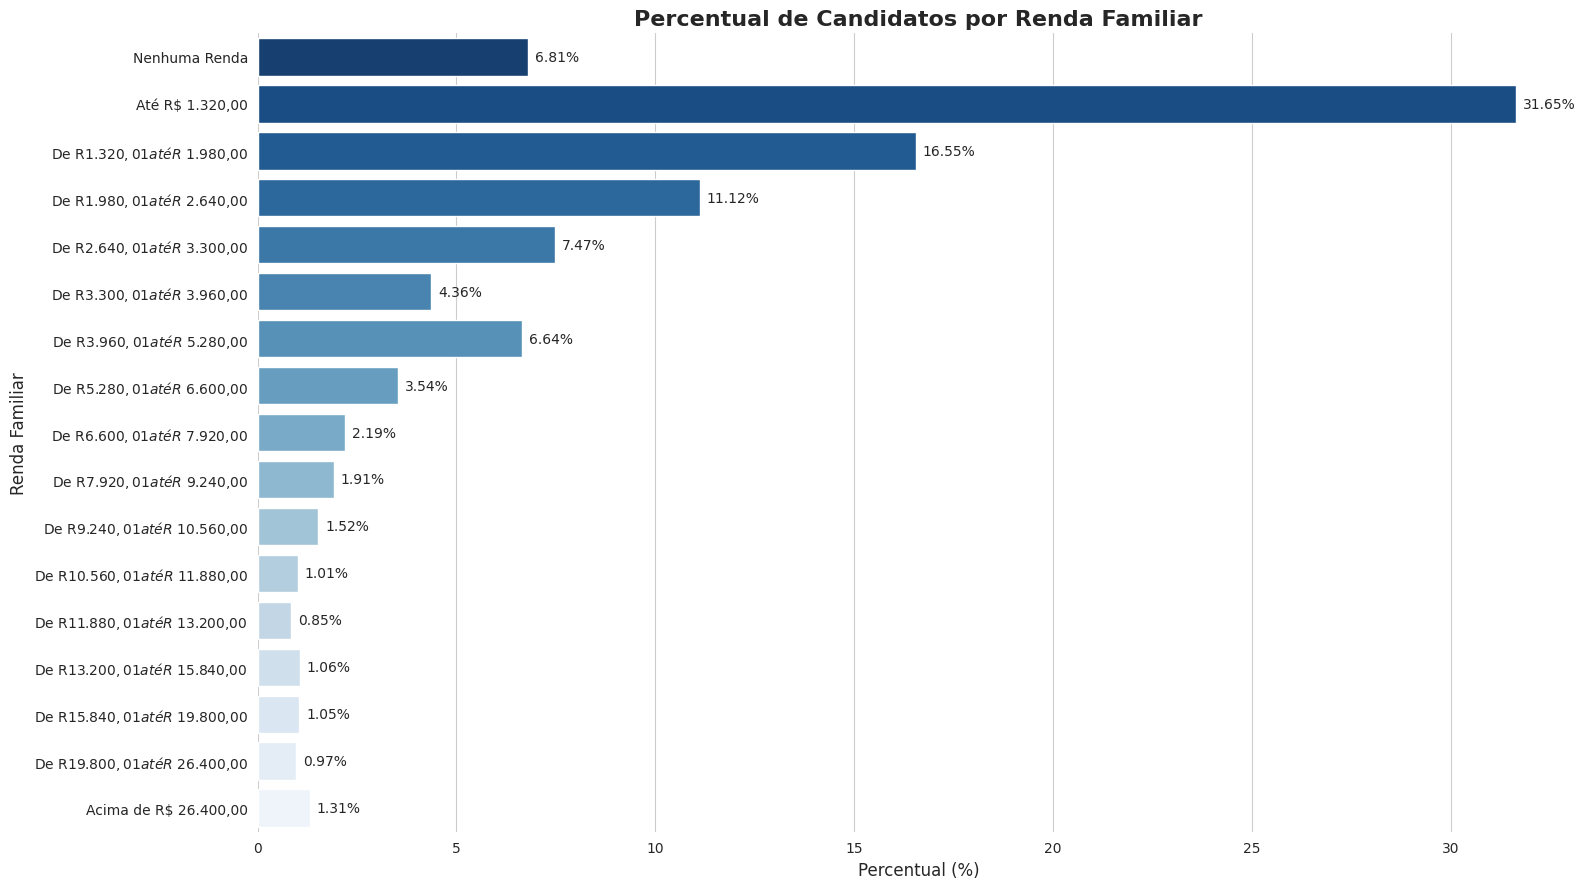

In [0]:
#conversao para um dataframe do pandas

df_faixa_renda = _sqldf.toPandas() # converte a ultima consulta realizada para um pandas dataframe 



#definição da ordem das faixas de renda

ordem_faixas_renda =  [
    "Nenhuma Renda",
    "Até R$ 1.320,00",
    "De R$ 1.320,01 até R$ 1.980,00",
    "De R$ 1.980,01 até R$ 2.640,00",
    "De R$ 2.640,01 até R$ 3.300,00",
    "De R$ 3.300,01 até R$ 3.960,00",
    "De R$ 3.960,01 até R$ 5.280,00",
    "De R$ 5.280,01 até R$ 6.600,00",
    "De R$ 6.600,01 até R$ 7.920,00",
    "De R$ 7.920,01 até R$ 9.240,00",
    "De R$ 9.240,01 até R$ 10.560,00",
    "De R$ 10.560,01 até R$ 11.880,00",
    "De R$ 11.880,01 até R$ 13.200,00",
    "De R$ 13.200,01 até R$ 15.840,00",
    "De R$ 15.840,01 até R$ 19.800,00",
    "De R$ 19.800,01 até R$ 26.400,00",
    "Acima de R$ 26.400,00"
]


#criação do gráfico

sns.set_style("whitegrid")

plt.figure(figsize=(16, 9))

ax = sns.barplot(

    data=df_faixa_renda,

    y='RENDA_FAMILIAR',

    x='PERCENTUAL_RENDA_FAMILIAR',

    order=ordem_faixas_renda, #aplica a ordem definida

    palette="Blues_r"

)


#Adicionando rótulos de dados e títulos

plt.title('Percentual de Candidatos por Renda Familiar', fontsize=16, fontweight='bold')

plt.xlabel('Percentual (%)', fontsize=12)

plt.ylabel('Renda Familiar', fontsize=12)



# Adicionar o valor do percentual ao lado de cada barra

for container in ax.containers:

    ax.bar_label(container, fmt='%.2f%%', padding=5)



sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

A partir do gráfico acima, podemos observar que a maioria dos candidatos tem renda familiar até R$ 1.320,0 (31,65%) e a segunda maior centração é a próxima faixa de renda entre R$ 1320,00 e R$ 1980,00.

### Análise geral do perfil dos inscritos do Enem 2023


### 2) Quantidade de faltantes

- **A)** Total  
- **B)** Por faixa etária  
- **C)** Por sexo  
- **D)** Por raça  
- **E)** Por tipo de escola de origem (rede pública x privada)  
- **F)** Por estado  
- **G)** Por renda familiar


**2. A) Quantidade total de faltantes**

In [0]:
%sql

SELECT COUNT(*) 
         FROM gold.fato_enem2023
         WHERE PRESENCA_CH = 'Faltou' 
            OR PRESENCA_CN = 'Faltou'
            
        

COUNT(*)
1252807


In [0]:
%sql
SELECT 
   ROUND( CAST(
        (SELECT COUNT(*) 
         FROM gold.fato_enem2023
         WHERE (PRESENCA_CH = 'Faltou' 
            OR PRESENCA_CN = 'Faltou')
       
        
        ) AS DOUBLE
    )
    /
    CAST(
        (SELECT COUNT(*) FROM gold.fato_enem2023) AS DOUBLE
    ),4) 
    AS taxa_faltantes;


taxa_faltantes
0.3185


Com base nas consultas acima, podemos ver que um total de 1.252.807.689 faltaram pelo menos um dia de prova de enem e isso representa um total de 31,85% dos inscritos na prova.


**2. B) Quantidade de faltantes por Faixa Etária**


In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_faltantes_faixa_etaria

FAIXA_ETARIA,TOTAL_FAIXA_ETARIA,PERCENTUAL_FAIXA_ETARIA
18 anos,221485,17.68
19 anos,138978,11.09
17 anos,132451,10.57
Entre 26 e 30 anos,131706,10.51
20 anos,97841,7.81
21 anos,74548,5.95
Entre 31 e 35 anos,73079,5.83
22 anos,59984,4.79
Menor de 17 anos,58631,4.68
23 anos,52024,4.15


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6024753315459172-2300689969:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


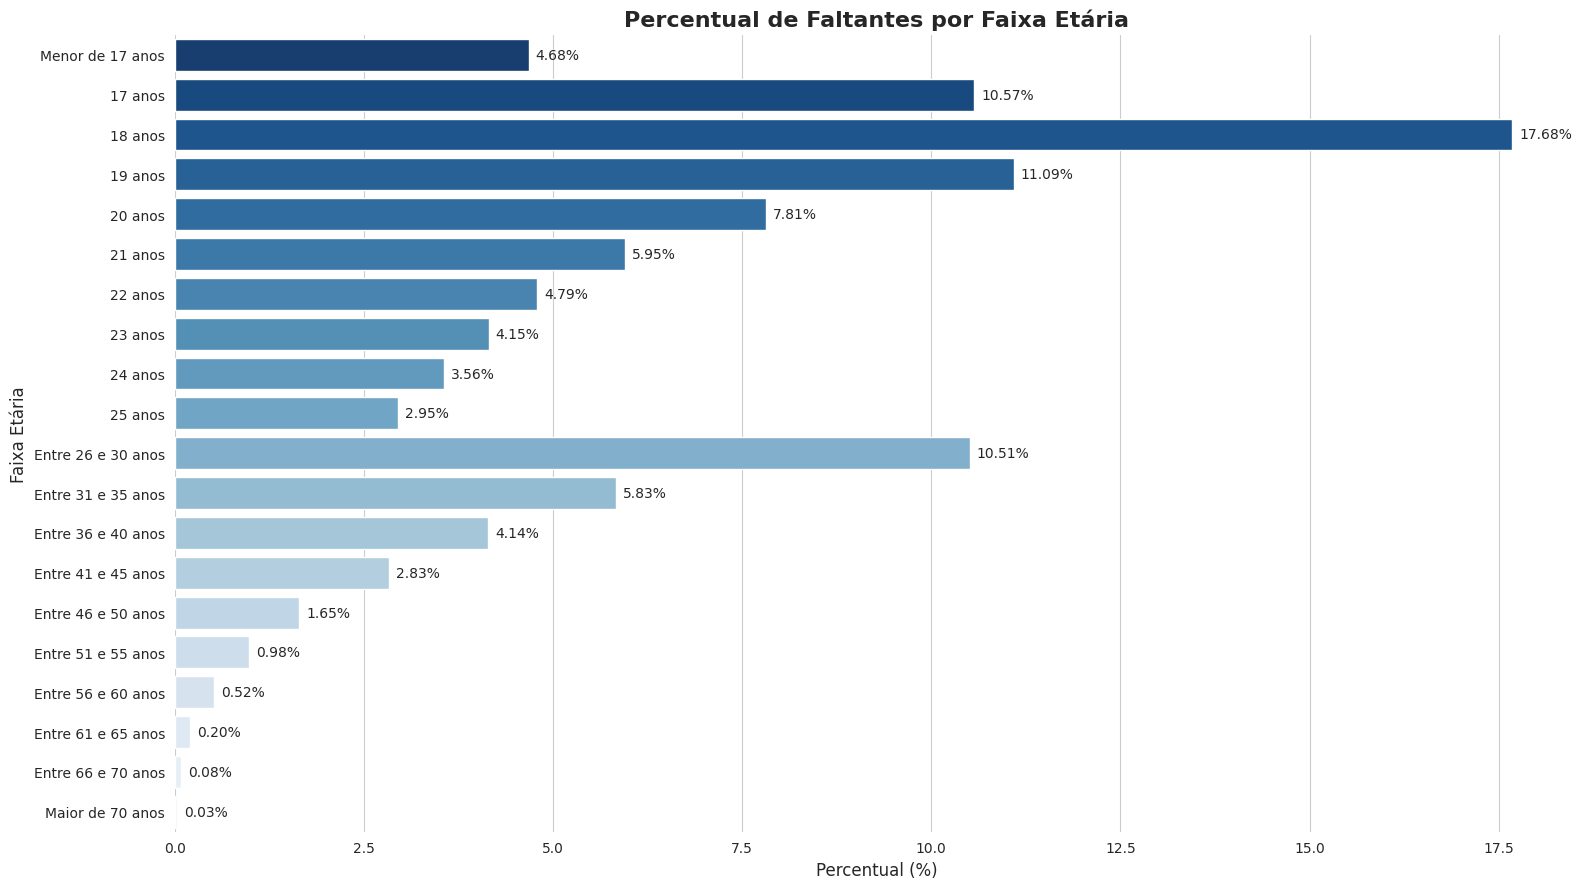

In [0]:
#conversao para um dataframe do pandas
df_faixa_etaria = _sqldf.toPandas() # converte a ultima consulta realizada para um pandas dataframe (df_faixa_etaria)

#definição da ordem das faixas
ordem_faixas = [
    'Menor de 17 anos',
    '17 anos',
    '18 anos',
    '19 anos',
    '20 anos',
    '21 anos',
    '22 anos',
    '23 anos',
    '24 anos',
    '25 anos',
    'Entre 26 e 30 anos',
    'Entre 31 e 35 anos',
    'Entre 36 e 40 anos',
    'Entre 41 e 45 anos',
    'Entre 46 e 50 anos',
    'Entre 51 e 55 anos',
    'Entre 56 e 60 anos',
    'Entre 61 e 65 anos',
    'Entre 66 e 70 anos',
    'Maior de 70 anos'
]

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(16, 9))

ax = sns.barplot(
    data=df_faixa_etaria,
    y='FAIXA_ETARIA', 
    x='PERCENTUAL_FAIXA_ETARIA',
    order=ordem_faixas, #aplica a ordem definida
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Percentual de Faltantes por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Faixa Etária', fontsize=12)

# Adicionar o valor do percentual ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Comparando a distribuição da faixa etária entre o candidatos inscritos e os faltantes, percebe-se que o gráfico se comporta de maneira semelhante, com uma distribuição mais alta para a idade de 18 anos tanto nos candidatos inscritos quanto nos faltantes. Sendo 17 anos a segunda idade mais frequente nos dados dos inscritos e 19 anos a idade mais frequente no dados dos faltantes. Essas frequências são coerentes para o conjunto de dados analisados, uma vez que muitos dos que realizam o enem estão concluindo o ensino médio e estão almejando uma vaga no ensino superior. 

Em ambos os casos, inscritos e faltantes, vemos que a distribuição diminui dos 18 aos 25 anos e tem um pico entre na faixa etaria seguinte, 26 a 30 anos, que agrega mais de um ano dentro dessa faixa e isso explica uma distribuição maior comparado aos 25 anos. A partir dessa faixa os dados voltam a cair, seguindo o mesmo padrão para a faixa etaria considerando os dois cenários.

Assim, é possível concluir que o perfil de faltantes é bem parecido com os inscritos, considerando a faixa etária e que a idade não é um fator relevante para justificar a falta na prova.

%md
**2. C) Quantidade de faltantes por sexo**


In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_faltantes_sexo


SEXO,TOTAL_POR_SEXO,PERCENTUAL_POR_SEXO
Feminino,765726,61.12
Masculino,487081,38.88


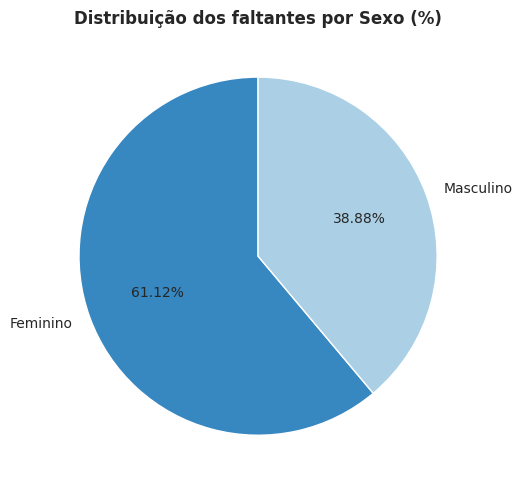

In [0]:
df_dist_sexo = _sqldf.toPandas()
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    df_dist_sexo["PERCENTUAL_POR_SEXO"],
    labels=df_dist_sexo["SEXO"],
    autopct="%.2f%%",
    startangle=90,
    colors=sns.color_palette("Blues_r", len(df_dist_sexo))
)
ax.set_title("Distribuição dos faltantes por Sexo (%)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Comparando o perfil dos faltantes com o dos inscritos, isolando a variável “sexo”, também não é possível identificar nenhum perfil específico entre os faltantes da prova. Uma vez que a variação percentual é mínima, menos de 1% entre os dois grupos.

 **2.D) Quantidade de faltantes por raça**

In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_faltantes_por_raca

COR_RACA,TOTAL_POR_RACA,PERCENTUAL_POR_RACA
Parda,588279,46.96
Branca,420953,33.60
Preta,192126,15.34
Amarela,21786,1.74
Não declarado,19317,1.54
Indígena,10346,0.83


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6957472988117567-1978424054:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


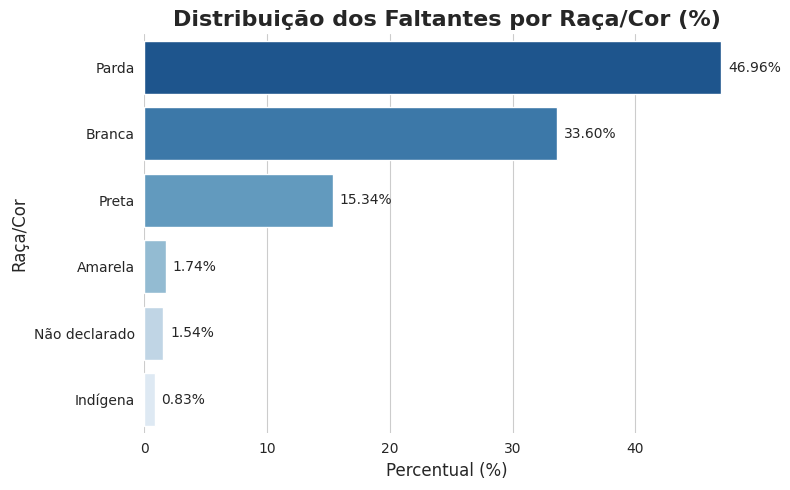

In [0]:
#conversao para um dataframe do pandas
df_dist_raca = _sqldf.toPandas() # converte a ultima consulta realizada para um pandas dataframe

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=df_dist_raca,
    y='COR_RACA', 
    x='PERCENTUAL_POR_RACA',
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Distribuição dos Faltantes por Raça/Cor (%)', fontsize=16, fontweight='bold')
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Raça/Cor', fontsize=12)

# Adicionar o valor do percentual ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Ao isolar a variavel "Raça/Cor" vemos que a tanto a distribuição dos faltantes quanto a distribuição geral de candidatos tem percentuais praticamente iguais. Com uma pequena variação percentual, com mais pardos e menos brancos entre os faltantes, que não é relevante considerando que estamos olhando um grupo bem menor.

Assim, o Pardos é o grupo mais numerosos em ambos os casos, seguidos por Brancos e Pretos. Amarelos, Indígenas e Não declarados tem aproximadamente 1% nos dois recortes.

**2.E) Quantidade de faltantes por tipo de escola de origem (rede pública e privada)**



In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_faltantes_tp_escola

TIPO_ESCOLA,TOTAL_TIPO_ESCOLA,PERCENTUAL_TIPO_ESCOLA
Não Respondeu,903591,72.13
Pública,336078,26.83
Privada,13138,1.05


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6957472988117571-1504238478:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


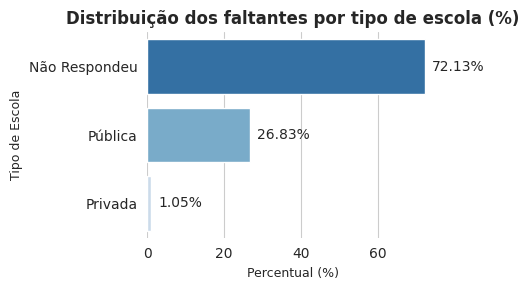

In [0]:
df_dist_tp_ecola = _sqldf.toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(5, 3))

ax = sns.barplot(
    data=df_dist_tp_ecola,
    y="TIPO_ESCOLA", 
    x="PERCENTUAL_TIPO_ESCOLA",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Distribuição dos faltantes por tipo de escola (%)', fontsize=12, fontweight='bold')
plt.xlabel('Percentual (%)', fontsize=9)
plt.ylabel('Tipo de Escola', fontsize=9)

# Adicionar o valor do percentual ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Em ambos os cenários, a maioria dos inscritos não respondeu sobre o tipo de escola em que estudaram. A distribuição dos dados segue o mesmo padrão: "Não repondeu" representa a maioria do casos, seguido por "Pública" e por fim "Privada".

Assim como as demais variaveis, não é possível verificar uma grande diferença entre o Inscritos e os Faltantes. No entanto, entre os faltantas há um percentual ainda maior de candidatos que não responderam a essa pergunta.

**2.F) Quantidade de faltantes por estado**



In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_faltantes_por_uf LIMIT 5

SG_UF_PROVA,TOTAL_POR_UF,PERCENTUAL_POR_UF
SP,180872,14.44
MG,108281,8.64
BA,103802,8.29
RJ,97614,7.79
PA,75697,6.04


Comparando os cinco estados com mais inscritos e com os os cinco estados com mais faltante, vemos os estados com mais inscritos são os que tem mais faltantes, excerto o quinto colocado, que entre os total de Inscritos foi o Ceará e entre os Faltante foi o Pará. 

Além disso, a diferença percentual entre os quatro primeiros nos dois grupos é de aproximadamente 1%. Com isso, vemos que não há um estado que se destaque pela quantidade de faltantes.

**2.G) Quantidade de faltantes por renda familiar**

In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
SELECT * FROM gold.perfil_faltantes_renda

RENDA_FAMILIAR,TOTAL_RENDA_FAMILIAR,PERCENTUAL_RENDA_FAMILIAR
"Até R$ 1.320,00",465272,37.14
"De R$ 1.320,01 até R$ 1.980,00",236003,18.84
"De R$ 1.980,01 até R$ 2.640,00",141144,11.27
Nenhuma Renda,112293,8.96
"De R$ 2.640,01 até R$ 3.300,00",84234,6.72
"De R$ 3.960,01 até R$ 5.280,00",59427,4.74
"De R$ 3.300,01 até R$ 3.960,00",43992,3.51
"De R$ 5.280,01 até R$ 6.600,00",28739,2.29
"De R$ 6.600,01 até R$ 7.920,00",16482,1.32
"De R$ 7.920,01 até R$ 9.240,00",13443,1.07


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6104829105864991-2380834189:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6104829105864991-2380834189:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


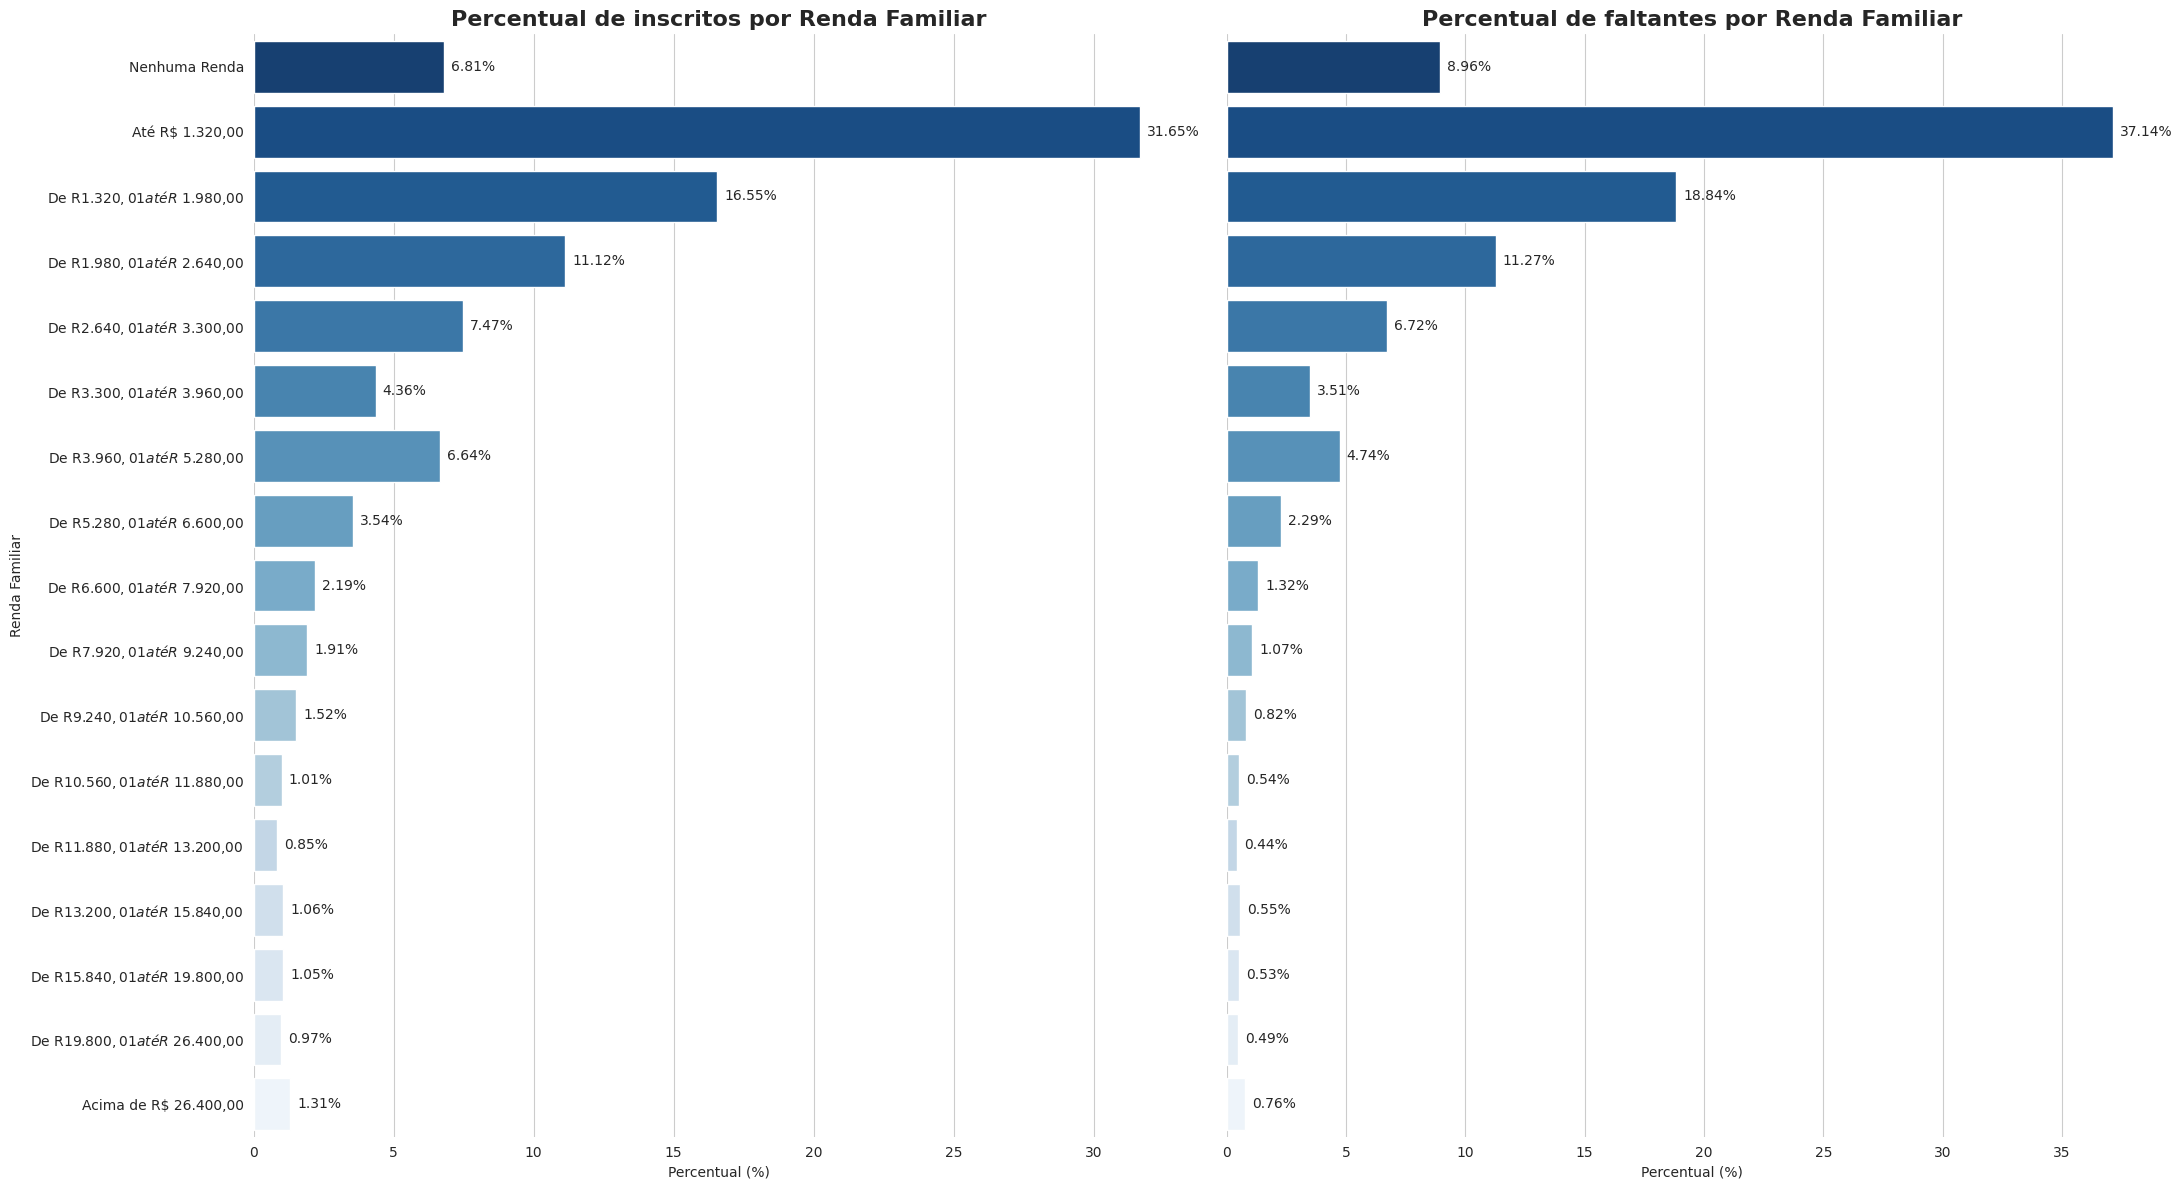

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

df_inscritos = sql("SELECT * FROM gold.perfil_inscritos_renda").toPandas() #dataframe com os inscritos
df_faltantes = sql("SELECT * FROM gold.perfil_faltantes_renda").toPandas() #dataframe com os faltantes

# ORDEM DAS FAIXAS


ordem_faixas_renda = [
    "Nenhuma Renda",
    "Até R$ 1.320,00",
    "De R$ 1.320,01 até R$ 1.980,00",
    "De R$ 1.980,01 até R$ 2.640,00",
    "De R$ 2.640,01 até R$ 3.300,00",
    "De R$ 3.300,01 até R$ 3.960,00",
    "De R$ 3.960,01 até R$ 5.280,00",
    "De R$ 5.280,01 até R$ 6.600,00",
    "De R$ 6.600,01 até R$ 7.920,00",
    "De R$ 7.920,01 até R$ 9.240,00",
    "De R$ 9.240,01 até R$ 10.560,00",
    "De R$ 10.560,01 até R$ 11.880,00",
    "De R$ 11.880,01 até R$ 13.200,00",
    "De R$ 13.200,01 até R$ 15.840,00",
    "De R$ 15.840,01 até R$ 19.800,00",
    "De R$ 19.800,01 até R$ 26.400,00",
    "Acima de R$ 26.400,00"
]

sns.set_style("whitegrid")

# GRÁFICOS


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 12), sharey=True)

# GRÁFICO 1: INSCRITOS
sns.barplot(
    data=df_inscritos,
    y="RENDA_FAMILIAR",
    x="PERCENTUAL_RENDA_FAMILIAR",
    order=ordem_faixas_renda,
    palette="Blues_r",
    ax=ax1
)

ax1.set_title("Percentual de inscritos por Renda Familiar", fontsize=16, fontweight='bold')
ax1.set_xlabel("Percentual (%)")
ax1.set_ylabel("Renda Familiar")

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.2f%%", padding=5)

sns.despine(left=True, bottom=True, ax=ax1)

#GRÁFICO 2: FALTANTES 
sns.barplot(
    data=df_faltantes,
    y="RENDA_FAMILIAR",
    x="PERCENTUAL_RENDA_FAMILIAR",
    order=ordem_faixas_renda,
    palette="Blues_r",
    ax=ax2
)

ax2.set_title("Percentual de faltantes por Renda Familiar", fontsize=16, fontweight='bold')
ax2.set_xlabel("Percentual (%)")
ax2.set_ylabel("")

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.2f%%", padding=5)

sns.despine(left=True, bottom=True, ax=ax2)

plt.tight_layout()
plt.show()


Ao analisar os dados de renda, vemos que a maioria dos inscritos se concentra na faixa de renda de até R$ 1.320 e o mesmo ocorrre entre os faltantes. No entanto, a concentração de faltantes que possuem essa faixa de renda é significativamente maior (<b>5,49%</b> maior) do que o outro grupo. 

Comparando os inscritos com "Nenhuma Renda" e os inscritos com renda entre R$ 1320,00 e R$ 1980,00 também é possível perceber um aumento da concentração de faltantes comparada aos inscritos.

É possível notar ainda que esse padrão se inverte  a partir da faixa "De R$ 2.640,01 até R$ 3.300,00", em que é possível observar que com o percentual de faltantes é consistente menor que os inscritos nas respectivas faixas de renda. 

Assim, é possível concluir que a variável <b>Renda Familiar </b> influencia na taxa de abstenção dos candidatos. O que demonstra que que a renda pode atrapalhar o preparo ou até mesmo a logística dos candidatos na hora da prova. Enquanto os candidatos a renda mais alta possuem taxa de abstenção relativa menor.


### 3) Notas por UF.


In [0]:
%sql
-- a tabela gold agregada com essa análise já foi criada no notebook 03 - Tabelas Gold
-- Nela é possível ver a a nota média em cada disciplina por UF e a média das disciplinas por UF
SELECT * FROM gold.media_por_uf

MEDIA_CN,MEDIA_MT,MEDIA_CH,MEDIA_LC,MEDIA_REDACAO,MEDIA_DISCIPLINAS,UF
516.43,570.46,547.65,537.07,678.3,569.98,MG
516.97,574.62,550.24,544.16,658.39,568.88,SP
512.52,564.87,547.27,538.82,658.85,564.47,SC
515.96,558.07,548.25,541.42,657.16,564.17,DF
511.12,559.43,541.49,531.81,669.67,562.7,ES
510.53,560.61,544.34,539.74,655.99,562.24,RS
508.59,555.44,545.07,536.03,662.96,561.62,RJ
509.11,555.89,541.14,535.59,630.86,554.52,PR
499.19,536.46,526.65,520.65,662.66,549.12,GO
495.42,528.44,525.71,518.79,646.58,542.99,RN


###Análise dos Estados com as maiores médias em Ciências da Natureza

/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6090149144177678-1696198838:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


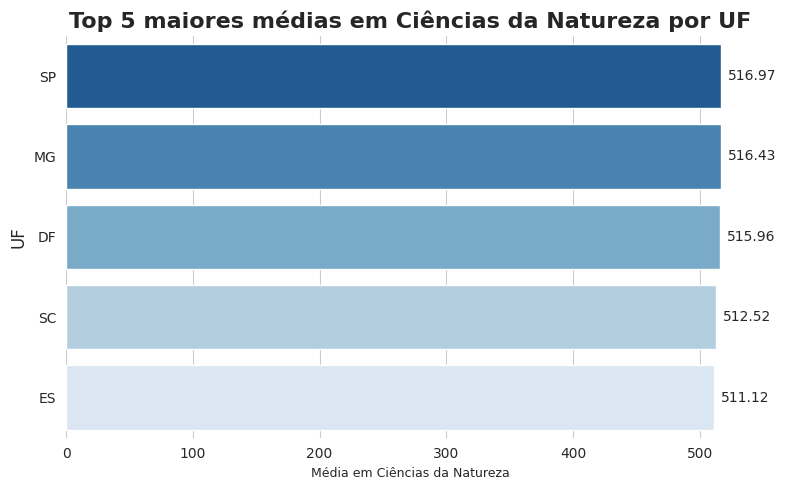

In [0]:
#Análise dos Estados com a maior media nas provas
df_dist_media_uf = sql("SELECT * FROM gold.media_por_uf ORDER BY MEDIA_CN DESC LIMIT 5").toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df_dist_media_uf,
    y="UF", 
    x="MEDIA_CN",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Top 5 maiores médias em Ciências da Natureza por UF', fontsize=16, fontweight='bold')
plt.xlabel('Média em Ciências da Natureza', fontsize=9)
plt.ylabel('UF', fontsize=12)

# Adicionar o valor da média ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Como é possível ver no gráfico acima, os estados com as maiores médias em Ciências da Natureza são respectivamente as UF de São Paulo, Minas Gerais, Distrito Federal, Santa Catarina e Espírito Santo. É possível notar ainda, uma diferença pequena de pontuação entre os primeiros colocados.

###Análise dos Estados com as maiores médias em Matemática

/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6090149144177679-125767319:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


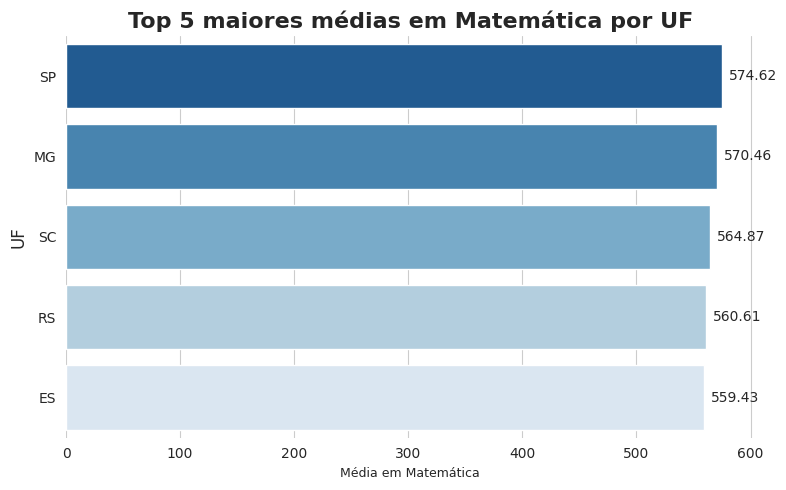

In [0]:
#Análise dos Estados com a maior media nas provas
df_dist_media_uf = sql("SELECT * FROM gold.media_por_uf ORDER BY MEDIA_MT DESC LIMIT 5").toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df_dist_media_uf,
    y="UF", 
    x="MEDIA_MT",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Top 5 maiores médias em Matemática por UF', fontsize=16, fontweight='bold')
plt.xlabel('Média em Matemática', fontsize=9)
plt.ylabel('UF', fontsize=12)

# Adicionar o valor da média ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Como é possível ver no gráfico acima, os estados com as maiores médias em Matemática são respectivamente as UF de São Paulo, Minas Gerais, Santa Catarina, Rio Grande do Sul e Espírito Santo. 

/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6090149144177680-2739980988:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


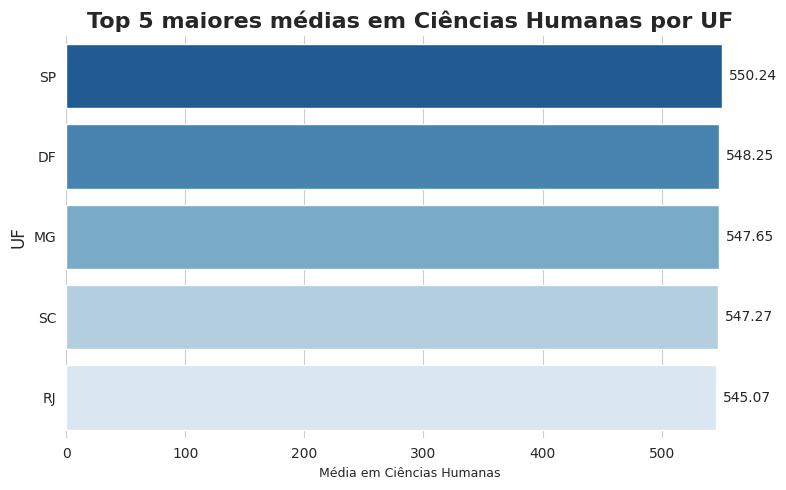

In [0]:
#Análise dos Estados com a maior media nas provas
df_dist_media_uf = sql("SELECT * FROM gold.media_por_uf ORDER BY MEDIA_CH DESC LIMIT 5").toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df_dist_media_uf,
    y="UF", 
    x="MEDIA_CH",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Top 5 maiores médias em Ciências Humanas por UF', fontsize=16, fontweight='bold')
plt.xlabel('Média em Ciências Humanas', fontsize=9)
plt.ylabel('UF', fontsize=12)

# Adicionar o valor da média ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



Com relação a Ciências Humanas, os estados com as maiores notas são respectivamente e São Paulo, Distrito Federal, Santa Catarina, Minas Gerais e Rio de Janeiro. É possível notar ainda, uma diferença pequena de pontuação entre os primeiros colocados.

/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6090149144177681-2164068540:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


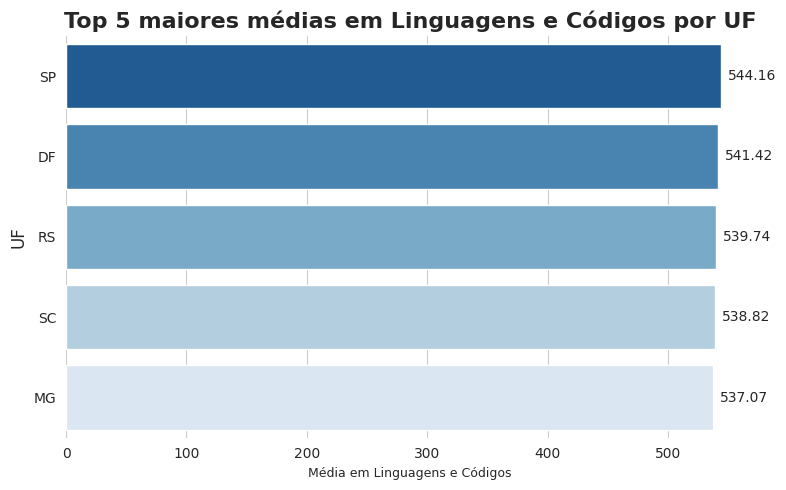

In [0]:
#Análise dos Estados com a maior media nas provas
df_dist_media_uf = sql("SELECT * FROM gold.media_por_uf ORDER BY MEDIA_LC DESC LIMIT 5").toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df_dist_media_uf,
    y="UF", 
    x="MEDIA_LC",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Top 5 maiores médias em Linguagens e Códigos por UF', fontsize=16, fontweight='bold')
plt.xlabel('Média em Linguagens e Códigos', fontsize=9)
plt.ylabel('UF', fontsize=12)

# Adicionar o valor da média ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()



Na prova de Linguagens, os estados com as maiores notas são respectivamente e São Paulo, Distrito Federal, Rio Grande do Sul, Santa Catarina e Minas Gerais. 

/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6090149144177682-1107870874:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


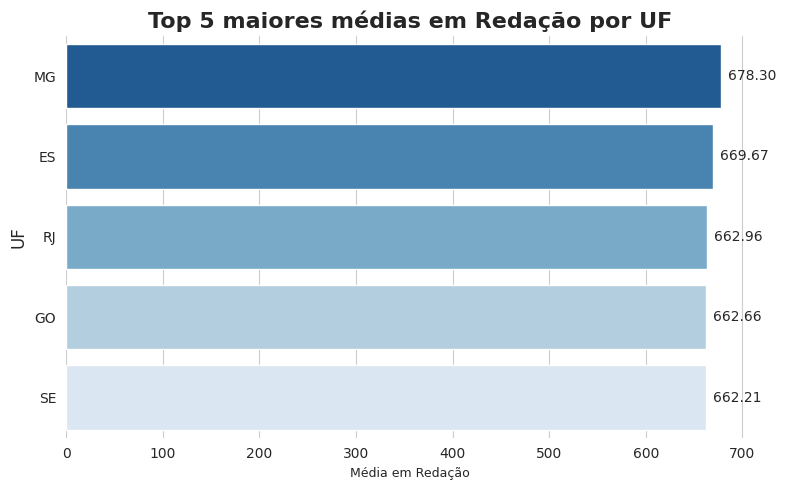

In [0]:
#Análise dos Estados com a maior media nas provas
df_dist_media_uf = sql("SELECT * FROM gold.media_por_uf ORDER BY MEDIA_REDACAO DESC LIMIT 5").toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df_dist_media_uf,
    y="UF", 
    x="MEDIA_REDACAO",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Top 5 maiores médias em Redação por UF', fontsize=16, fontweight='bold')
plt.xlabel('Média em Redação', fontsize=9)
plt.ylabel('UF', fontsize=12)

# Adicionar o valor da média ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Já as maiores notas em Redação são respectivamente das UF  Minas Gerais, Espírito Santo, São Paulo, Rio de Janeiro e Santa Catarina.

/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-6090149144177666-250398988:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


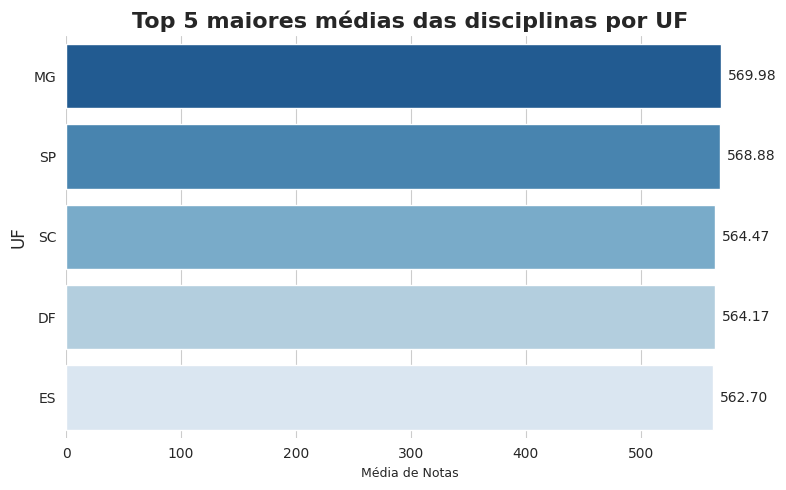

In [0]:
#Análise dos Estados com a maior media nas provas
df_dist_media_uf = sql("SELECT * FROM gold.media_por_uf LIMIT 5").toPandas() #conversao para um dataframe do pandas

#criação do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df_dist_media_uf,
    y="UF", 
    x="MEDIA_DISCIPLINAS",
    palette="Blues_r"
)

#Adicionando rótulos de dados e títulos
plt.title('Top 5 maiores médias das disciplinas por UF', fontsize=16, fontweight='bold')
plt.xlabel('Média de Notas', fontsize=9)
plt.ylabel('UF', fontsize=12)

# Adicionar o valor da média ao lado de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


Considerando a nota de todas as disciplinas, o Ranking da média das notas nas disciplinas segue a seguinte ordem: Minas Gerais, São Paulo, Santa Catarina, Distrito Federal e Espirito Santo.

Apesar de ter ficado no primeiro lugar em 4 das 5 disciplinas, o estado de São Paulo ficou em segundo lugar na média geral das disciplinas. Já o primeiro colocado na média geral foi Minas Gerais, que ficou em primeiro lugar apenas na disciplina de Redação.

Três Estados apareceram em todos no top 5 de todos os rankings análisados nessa seção: são eles Minas Gerais, São Paulo e Santa Catarina.

Por fim, é possível notar que as maiores médias estão presentes nos estados do Sul e do Sudeste, além do Distritito Federal e nenhum dos estados do Norte e Nordeste aparecem no Ranking.


### 4) Análise das média das disciplinas considerando fatores os socioeconômicos: 
- **A)** Nível de educação dos pais
- **b)** Renda
- **c)** Raça

**4. B) Análise por escolaridade dos pais**


**- Escolaridade Pai**

In [0]:
df_media_disciplinas = sql("""
SELECT c.ESCOLARIDADE_PAI, f.MEDIA_DISCIPLINAS
FROM gold.notas_validas f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
ORDER BY f.MEDIA_DISCIPLINAS DESC
""").toPandas()

df_media_disciplinas.groupby('ESCOLARIDADE_PAI').describe().sort_values(by=('MEDIA_DISCIPLINAS', 'mean'),ascending = False)


MEDIA_DISCIPLINAS  ...        
                                                               count  ...     max
ESCOLARIDADE_PAI                                                      ...        
Completou a Pós-graduação.                                  211425.0  ...  850.40
Completou a Faculdade, mas não completou a Pós-...          265439.0  ...  862.58
Completou o Ensino Médio, mas não completou a F...          786146.0  ...  848.02
Completou a 8ª série/9º ano do Ensino Fundament...          285917.0  ...  836.60
Completou a 4ª série/5º ano, mas não completou ...          318246.0  ...  847.54
Não sei.                                                    236104.0  ...  826.58
Não completou a 4ª série/5º ano do Ensino Funda...          391778.0  ...  829.82
Nunca estudou.                                               90060.0  ...  840.26

[8 rows x 8 columns]

Conforme observado no quadro acima, a escolaridade do Pai influencia diretamente nas **média das disciplinas** no Enem. Uma vez que podemos ver que menor média é entre os candidatos cujo pai nunca estudou e a maior média entre os candidatos cujos pais que completaram a pós-graduação.

Apesar disso, ao observarmos a nota máxima das categorias, é possível econtrar a médida de notas altas em todos os grupos análisados, que representa exceções.

**4. B) Análise por escolaridade dos pais - Escolaridade Mãe**

In [0]:
df_media_disciplinas = sql("""
SELECT c.ESCOLARIDADE_MAE, f.MEDIA_DISCIPLINAS
FROM gold.notas_validas f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
ORDER BY f.MEDIA_DISCIPLINAS DESC
""").toPandas()

df_media_disciplinas.groupby('ESCOLARIDADE_MAE').describe().sort_values(by=('MEDIA_DISCIPLINAS', 'mean'),ascending = False)




MEDIA_DISCIPLINAS  ...        
                                                               count  ...     max
ESCOLARIDADE_MAE                                                      ...        
Completou a Pós-graduação.                                  356502.0  ...  848.14
Completou a Faculdade, mas não completou a Pós-...          352158.0  ...  847.06
Completou o Ensino Médio, mas não completou a F...          939955.0  ...  862.58
Completou a 8ª série/9º ano do Ensino Fundament...          291145.0  ...  823.94
Completou a 4ª série/5º ano, mas não completou ...          253638.0  ...  825.26
Não sei.                                                     71519.0  ...  816.72
Não completou a 4ª série/5º ano do Ensino Funda...          266650.0  ...  840.26
Nunca estudou.                                               53548.0  ...  810.82

[8 rows x 8 columns]

A mesma conclusão pode ser obtida quando analisamos a influência da escolarida da mãe na **média das disciplinas** no Enem. Assim, vemos que quanto maior a escolaridade da mãe, maior a nota no enem.


**4. B) Análise por renda**


In [0]:
df_media_disciplinas = sql("""
SELECT c.RENDA_FAMILIAR, f.MEDIA_DISCIPLINAS
FROM gold.notas_validas f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
ORDER BY f.MEDIA_DISCIPLINAS DESC
""").toPandas()

df_media_disciplinas.groupby('RENDA_FAMILIAR').describe().sort_values(by=('MEDIA_DISCIPLINAS', 'mean'),ascending = False)


MEDIA_DISCIPLINAS              ...                 
                                             count        mean  ...      75%     max
RENDA_FAMILIAR                                                  ...                 
Acima de R$ 26.400,00                      41452.0  646.495338  ...  704.245  850.40
De R$ 19.800,01 até R$ 26.400,00           31607.0  641.801739  ...  698.580  844.70
De R$ 15.840,01 até R$ 19.800,00           34138.0  634.292531  ...  691.940  840.88
De R$ 13.200,01 até R$ 15.840,00           34329.0  628.981051  ...  686.940  840.64
De R$ 11.880,01 até R$ 13.200,00           27770.0  626.552730  ...  684.840  847.06
De R$ 10.560,01 até R$ 11.880,00           32423.0  619.398054  ...  678.260  839.10
De R$ 9.240,01 até R$ 10.560,00            48649.0  614.935441  ...  673.520  847.26
De R$ 7.920,01 até R$ 9.240,00             60825.0  609.897813  ...  668.840  844.52
De R$ 6.600,01 até R$ 7.920,00             68389.0  602.231733  ...  661.360  848.02
De R$ 5.280,01 até R$ 6.600,00            108563.0  594.007474  ...  652.760  862.58
De R$ 3.960,01 até R$ 5.280,00            197769.0  581.957050  ...  639.340  836.60
De R$ 3.300,01 até R$ 3.960,00            124314.0  570.205703  ...  626.400  834.10
De R$ 2.640,01 até R$ 3.300,00            204195.0  558.495675  ...  613.550  836.80
De R$ 1.980,01 até R$ 2.640,00            286942.0  545.452249  ...  598.700  847.54
De R$ 1.320,01 até R$ 1.980,00            399835.0  530.919627  ...  582.260  835.58
Até R$ 1.320,00                           738577.0  507.450516  ...  557.220  840.26
Nenhuma Renda                             145338.0  488.669521  ...  534.520  806.92

[17 rows x 8 columns]

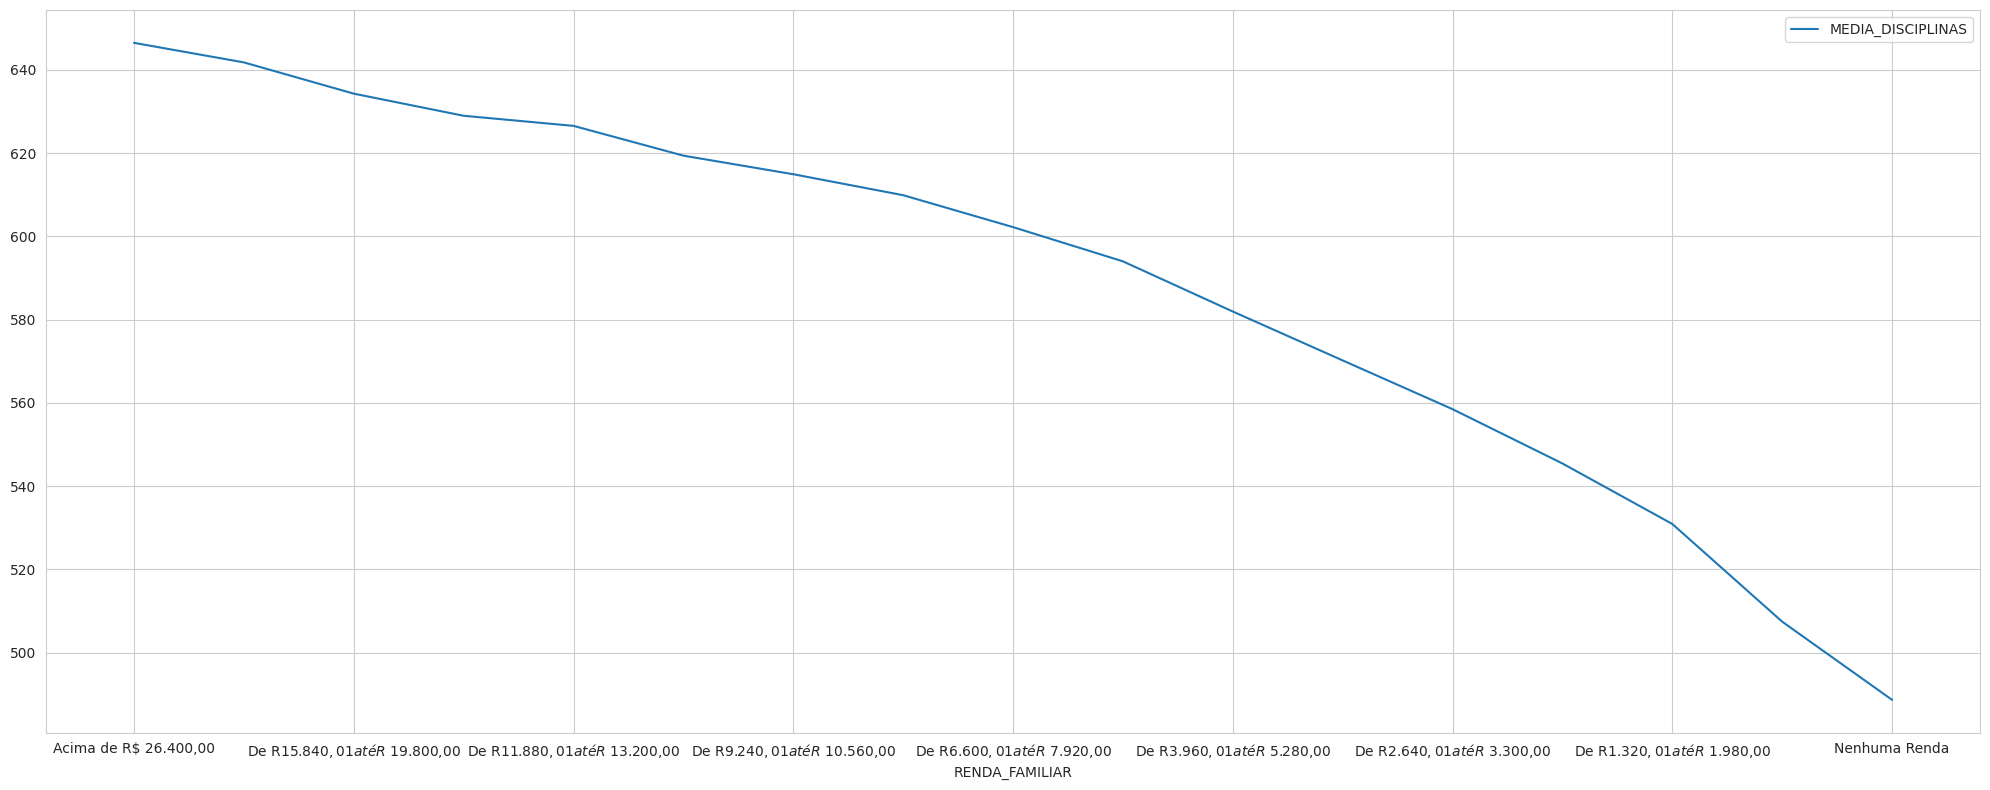

In [0]:
graf = df_media_disciplinas.groupby('RENDA_FAMILIAR').mean().sort_values(by='MEDIA_DISCIPLINAS',ascending = False)
ax = graf.plot(figsize=(20,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', wrap=True)
plt.tight_layout()
plt.show()

A tabela e o gráfico acima permitemos analisar a relação entre a renda familiar e a média das notas das disciplinas. Nota-se que a nota aumenta de forma consistente conforme o aumento da renda e essa relação relação entre nota e desempenho acadêmico é linear, como observado no notar no gráfico acima.



**4. C) Análise por faixa etária**


In [0]:
df_media_disciplinas = sql("""
SELECT c.FAIXA_ETARIA, f.MEDIA_DISCIPLINAS
FROM gold.notas_validas f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
ORDER BY f.MEDIA_DISCIPLINAS DESC
""").toPandas()

df_media_disciplinas.groupby('FAIXA_ETARIA').describe().sort_values(by=('MEDIA_DISCIPLINAS', 'mean'),ascending = False)


MEDIA_DISCIPLINAS              ...                 
                               count        mean  ...      75%     max
FAIXA_ETARIA                                      ...                 
17 anos                     599704.0  555.247590  ...  616.160  848.14
Menor de 17 anos            276981.0  554.419378  ...  613.880  819.92
21 anos                     105607.0  550.592721  ...  615.460  844.46
20 anos                     163963.0  549.937066  ...  614.820  842.12
22 anos                      75864.0  549.096448  ...  612.360  835.58
19 anos                     281924.0  548.850240  ...  612.960  848.02
18 anos                     658141.0  548.055817  ...  609.100  862.58
23 anos                      58357.0  546.456760  ...  607.380  840.14
24 anos                      45660.0  542.319606  ...  601.890  836.80
25 anos                      35299.0  539.523977  ...  597.550  840.26
Entre 26 e 30 anos          111499.0  533.599315  ...  591.490  834.94
Entre 31 e 35 anos           58292.0  526.031428  ...  581.280  843.46
Entre 36 e 40 anos           43102.0  513.987978  ...  567.335  847.54
Entre 41 e 45 anos           29906.0  502.506592  ...  553.360  806.46
Entre 46 e 50 anos           18830.0  495.992947  ...  545.275  796.34
Entre 51 e 55 anos           11409.0  493.363315  ...  543.300  796.76
Entre 56 e 60 anos            6410.0  493.018655  ...  543.615  808.12
Entre 61 e 65 anos            2732.0  485.798170  ...  534.075  782.08
Entre 66 e 70 anos            1045.0  475.013608  ...  523.620  735.48
Maior de 70 anos               390.0  468.144051  ...  519.085  693.66

[20 rows x 8 columns]

Os dados acima mostram que as maiores media nas disciplinas estão entre os candidatos de 17 anos seguido pelos menores de 17 anos, com uma pequena variação na pontução. Já os alunos com 18 anos e com 19 anos ocupan apenas a 7º e 6º colocação no ranking. Contudo, a partir dos 24 anos, as médias nas disciplinas se tornam consistentemente menores quanto maior a faixa etária, o que pode ser justificado por um tempo maior sem estudar as disciplinas cobradas na prova.


**4. d) Análise por tipo de escola**



Não será realizada essa análise uma vez que a maioria dos candidatos não informou o tipo de escola

### 5) Perfil dos participantes que tiraram mil na redação.


In [0]:
%sql
SELECT COUNT(*) as TOTAL
FROM gold.fato_enem2023 
WHERE NOTA_REDACAO = 1000


TOTAL
60


In [0]:
df_notas_redacao = sql("""
SELECT c.FAIXA_ETARIA, COUNT(*) as TOTAL_FAIXA_ETARIA
FROM gold.fato_enem2023 f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
WHERE NOTA_REDACAO = 1000
GROUP BY  c.FAIXA_ETARIA,
          f.NOTA_REDACAO
ORDER BY TOTAL_FAIXA_ETARIA DESC
""").toPandas()

df_notas_redacao['PERCENTUAL_FAIXA_ETARIA'] = ((df_notas_redacao['TOTAL_FAIXA_ETARIA'] / df_notas_redacao['TOTAL_FAIXA_ETARIA'].sum()) * 100).round(2)

display(df_notas_redacao)

FAIXA_ETARIA,TOTAL_FAIXA_ETARIA,PERCENTUAL_FAIXA_ETARIA
20 anos,16,26.67
17 anos,11,18.33
18 anos,10,16.67
19 anos,8,13.33
21 anos,8,13.33
Entre 26 e 30 anos,4,6.67
Entre 31 e 35 anos,2,3.33
23 anos,1,1.67


/home/spark-e995dc57-1a2e-43d6-8f5f-ca/.ipykernel/2533/command-8598658120077088-1659977825:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


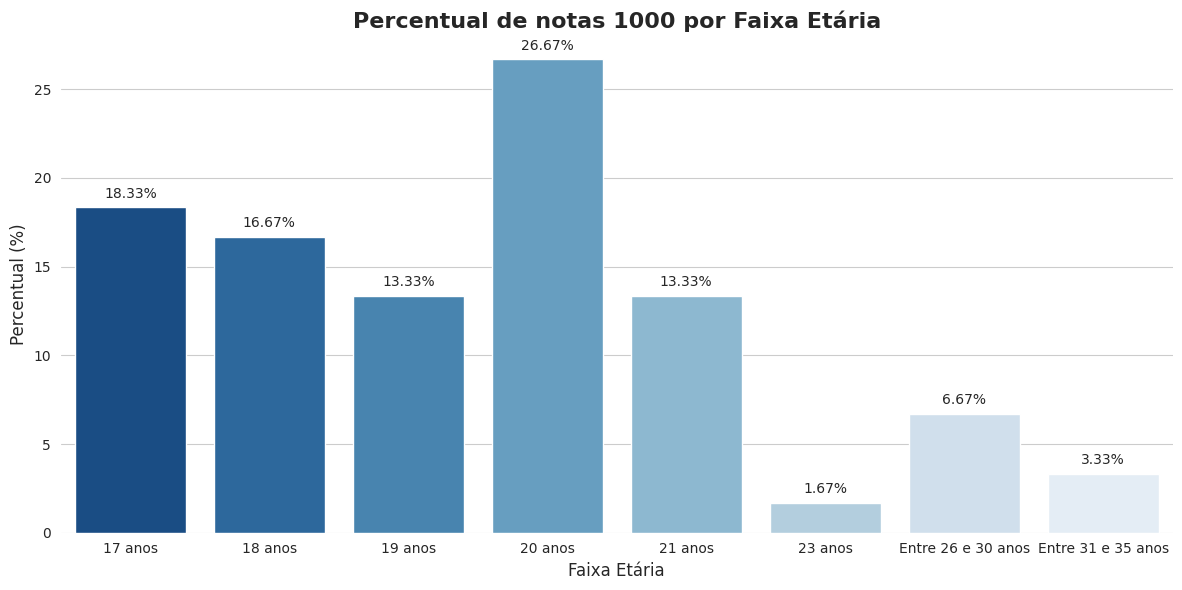

In [0]:
#definição da ordem das faixas
ordem_faixas = [
    'Menor de 17 anos',
    '17 anos',
    '18 anos',
    '19 anos',
    '20 anos',
    '21 anos',
    '22 anos',
    '23 anos',
    '24 anos',
    '25 anos',
    'Entre 26 e 30 anos',
    'Entre 31 e 35 anos',
    'Entre 36 e 40 anos',
    'Entre 41 e 45 anos',
    'Entre 46 e 50 anos',
    'Entre 51 e 55 anos',
    'Entre 56 e 60 anos',
    'Entre 61 e 65 anos',
    'Entre 66 e 70 anos',
    'Maior de 70 anos'
]

# Filtrar apenas faixas etárias presentes nos dados
faixas_presentes = [faixa for faixa in ordem_faixas if faixa in df_notas_redacao['FAIXA_ETARIA'].values]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df_notas_redacao,
    x='FAIXA_ETARIA',
    y='PERCENTUAL_FAIXA_ETARIA',
    order=faixas_presentes,
    palette="Blues_r"
)

plt.title('Percentual de notas 1000 por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', padding=5) 

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Apenas 60 candidatos alcançaram notas 1000 na redação do Enem. Desses, 16 tinham 20 anos, o que representa 26,67% dos que tiraram a nota máxima, como observado no gráfico e na tabela acima.

Uma possível explicação para ter candidatos um pouco mais velhos entre os que tiraram a nota máxima, é que essa pode não ser a primeira vez que estão realizando a prova.

In [0]:
df_notas_redacao = sql("""
SELECT c.RENDA_FAMILIAR, COUNT(*) as TOTAL_RENDA_FAMILIAR
FROM gold.fato_enem2023 f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
WHERE NOTA_REDACAO = 1000
GROUP BY  c.RENDA_FAMILIAR,
          f.NOTA_REDACAO
ORDER BY TOTAL_RENDA_FAMILIAR DESC
""").toPandas()
df_notas_redacao['PERCENTUAL_RENDA_FAMILIAR'] = ((df_notas_redacao['TOTAL_RENDA_FAMILIAR'] / df_notas_redacao['TOTAL_RENDA_FAMILIAR'].sum()) * 100).round(2)


display(df_notas_redacao)

RENDA_FAMILIAR,TOTAL_RENDA_FAMILIAR,PERCENTUAL_RENDA_FAMILIAR
"De R$ 3.960,01 até R$ 5.280,00",9,15.0
"De R$ 19.800,01 até R$ 26.400,00",7,11.67
"Até R$ 1.320,00",5,8.33
"De R$ 15.840,01 até R$ 19.800,00",4,6.67
"De R$ 10.560,01 até R$ 11.880,00",4,6.67
"De R$ 1.320,01 até R$ 1.980,00",4,6.67
"De R$ 13.200,01 até R$ 15.840,00",4,6.67
"De R$ 7.920,01 até R$ 9.240,00",4,6.67
"De R$ 5.280,01 até R$ 6.600,00",3,5.0
"De R$ 2.640,01 até R$ 3.300,00",3,5.0


A maioria das notas 1000 está na faixa de renda de R$ 3.960,01 até R$ 5.280,00, seguido pela faixa de R$ 19.800,01 até R$ 26.400,00. Assim, vemos que as notas não crescem de acordo com o aumento de renda, ou seja não há uma linearidade entre a nota 1000 e a renda.

Além disso, a faixa de renda mais frequente entre as notas 1000 não é a mesma faixa de renda mais frequente entre os inscritos do Enem 2023.

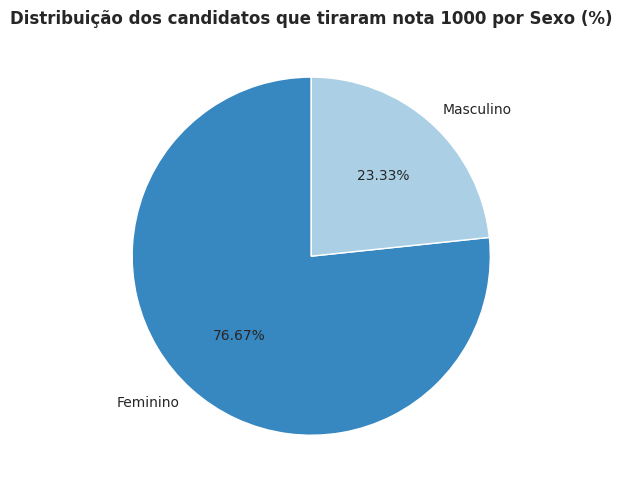

In [0]:
df_notas_redacao = sql("""
SELECT c.SEXO, COUNT(*) as TOTAL_POR_SEXO
FROM gold.fato_enem2023 f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
WHERE NOTA_REDACAO = 1000
GROUP BY  c.SEXO,
          f.NOTA_REDACAO
ORDER BY TOTAL_POR_SEXO DESC
""").toPandas()
df_notas_redacao['PERCENTUAL_POR_SEXO'] = ((df_notas_redacao['TOTAL_POR_SEXO'] / df_notas_redacao['TOTAL_POR_SEXO'].sum()) * 100).round(2)


fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(
    df_notas_redacao["PERCENTUAL_POR_SEXO"],
    labels=df_notas_redacao["SEXO"],
    autopct="%.2f%%",
    startangle=90,
    colors=sns.color_palette("Blues_r", len(df_notas_redacao))
)
ax.set_title("Distribuição dos candidatos que tiraram nota 1000 por Sexo (%)", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()




O gráfico acima revela que a maioria dos candidatos que tiraram nota 1000 são do sexo feminino, representando um percetual de 76,67% e esse distribuição representa um percetual maior que percentual de mulheres inscritas na prova 61,29%.

In [0]:
df_notas_redacao = sql("""
SELECT c.COR_RACA, COUNT(*) as TOTAL_POR_RACA
FROM gold.fato_enem2023 f
LEFT JOIN gold.dim_candidato c 
ON f.SK_CANDIDATO = c.SK_CANDIDATO
WHERE NOTA_REDACAO = 1000
GROUP BY  c.COR_RACA,
          f.NOTA_REDACAO
ORDER BY TOTAL_POR_RACA DESC
""").toPandas()

df_notas_redacao['PERCENTUAL_POR_RACA'] = ((df_notas_redacao['TOTAL_POR_RACA'] / df_notas_redacao['TOTAL_POR_RACA'].sum()) * 100).round(2)



display(df_notas_redacao)

COR_RACA,TOTAL_POR_RACA,PERCENTUAL_POR_RACA
Branca,39,65.0
Parda,13,21.67
Não declarado,5,8.33
Amarela,2,3.33
Preta,1,1.67


Por fim, vemos que dentre os que tirararam nota 1000, a maioria é da Cor/Raça Branca (65%), seguida por Parda (21,67%), Não Declarado (8,33%), Amarela (3,33%) e Preta (1,67%).
Essa distribuição das notas 1000 está discrepante da distribuição de inscritos na prova: Pardos (43,4%), Brancos (40,0%), Pretos (12,9%), Indígenas (0,6%),Amarelos (1,64%).


### Considerações Finais



O total de inscritos no Enem 2023 foi de 3.933.955, dos quais a maioria (23%) tem 18 anos. As mulheres representam mais de 60% do total (quase 10% a mais do que a proporção encontrada na população brasileira). Com relação a raça/cor, os três maiores grupos são: pardos, brancos e pretos. Como a maioria dos inscritos não informou a escola de origem, essa variável foi desconsiderada nas análises de desempenho. O estado com a maior quantidade de inscritos é São Paulo. Além disso, 31,65% dos candidatos possuem renda familiar de até R$ 1.320,00.

Analisando os faltantes, a taxa de abstenção foi de 31,85%. Ao avaliar as variáveis idade, raça/cor, escola de origem, estado e renda, percebemos que apenas a renda influencia significativamente as abstenções: candidatos com renda mais alta possuem taxas de abstenção relativas menores.

Quanto às médias por estado, Minas Gerais apresentou a maior média nas disciplinas. As maiores notas concentram-se nos estados do Sul e Sudeste, além do Distrito Federal; nenhum estado do Norte ou Nordeste aparece no topo do ranking de médias gerais.

Outro ponto relevante na análise socioeconômica é que tanto a escolaridade do pai quanto a da mãe influenciam diretamente o desempenho: as maiores médias pertencem a alunos cujos pais possuem maior nível de escolaridade. Da mesma forma, a renda é um fator decisivo: quanto maior a renda, maior a média nas disciplinas. Já a faixa etária com o melhor desempenho médio é a de 17 anos.

Por fim, sobre os candidatos que atingiram a nota máxima na redação (nota 1000), o perfil predominante é de jovens de 20 anos (26,67%), com renda entre R$ 3.960,01 e R$ 5.280,00 (15%). Desse grupo, 76,67% são mulheres e 65% autodeclarados brancos.
